In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
#Error. 책이랑 다름. keras를 tensorflow.keras로 수정

from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [23]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [24]:

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [27]:

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10208, saving model to ./model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10208 to 0.08895, saving model to ./model/03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08895 to 0.07855, saving model to ./model/04-0.0785.hdf5

Epoch 00005: val_loss improved from 0.07855 to 0.07392, saving model to ./model/05-0.0739.hdf5

Epoch 00006: val_loss improved from 0.07392 to 0.06673, saving model to ./model/06-0.0667.hdf5

Epoch 00007: val_loss improved from 0.06673 to 0.06524, saving model to ./model/07-0.0652.hdf5

Epoch 00008: val_loss improved from 0.06524 to 0.06307, saving model to ./model/08-0.0631.hdf5

Epoch 00009: val_loss did not improve from 0.06307

Epoch 00010: val_loss did not improve from 0.06307

Epoch 00011: val_loss did not improve from 0.06307

Epoch 00012: val_loss did not improve from 0.06307

Epoch 00013: val_loss impro

In [28]:

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.9835

 Test Accuracy: 0.9835


In [29]:

y_vloss = history.history['val_loss']

In [30]:

y_loss = history.history['loss']

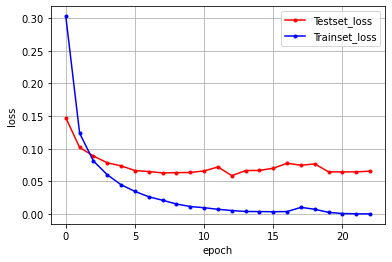

In [35]:

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()